In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [3]:
dataset = load_digits()
X, y = dataset.data, dataset.target
for name, count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(name, count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


# Imbalanced Dataset

In [4]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced!= 1] = 0

print('Original   :', y[1:30])
print('New BInary :', y_binary_imbalanced[1:30])

Original   : [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New BInary : [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
np.bincount(y_binary_imbalanced)

array([1615,  182], dtype=int64)

In [6]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [7]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

In [8]:
from sklearn.dummy import DummyClassifier
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_dummy_pred = dummy_major.predict(X_test)
y_dummy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [9]:
dummy_major.score(X_test, y_test)

0.9044444444444445

# Confusion Matrices

## Binary(two-class) 

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_dummy_pred = dummy_major.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy_pred)
print('Most frequent dummy classifier\n', confusion)

Most frequent dummy classifier
 [[407   0]
 [ 43   0]]


In [11]:
dummy_major = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_dummy_pred = dummy_major.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy_pred)
print('Stratified dummy classifier\n', confusion)

Stratified dummy classifier
 [[364  43]
 [ 40   3]]


In [12]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_pred)
print('SVM linear kernel classifier\n', confusion)

SVM linear kernel classifier
 [[402   5]
 [  5  38]]


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_pred)
print('Logistic regression classifier\n', confusion)

Logistic regression classifier
 [[401   6]
 [  6  37]]


In [14]:
from sklearn.tree import DecisionTreeClassifier

md = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tr_pred = md.predict(X_test)
confusion = confusion_matrix(y_test, tr_pred)
print('Decision Tree classifier\n', confusion)

Decision Tree classifier
 [[400   7]
 [ 17  26]]


### Some Important Pointers
1. Accuracy is  $\frac{TP+TN}{TN+TP+FP+FN}$
2. Classification error is  $\frac{FP+FN}{TN+TP+FP+FN}$  (1- Accuracy)
3. Recall is the number of true positives(TP) divided by the sum of true positives(TP) and false negatives(FN).  $\frac{TP}{TP+FN}$
4. Recall is called the True Positive Rate or Sensitivity or probability of detection.
5. Precision is the number of true positives(TP) divided by the sum of true positives(TP) and false positives(FP). $\frac{TP}{TP+FP}$
6. False positive rate (FPR) is false positive (FP) divided by sum of  false positive (FP) and true negative (TN). $\frac{FP}{FP+TN}$
7. Specificity is $\frac{TN}{FP+TN}$
8. There is a trade-off between precison and recall. If we want a system to have high precison, then it will have low recall and vice-versa.
9. High precision task may include search engine query suggestion task, ranking and document classification and improving customer experience.
10. High recall task may include tumor detection where we don't want a patient with tumor and result may give patient doesn't have tumor.
11. F1 score is the harmonic mean of precision and recall.
$\frac{2*precision*recall}{precision+recall}$
    or 
    $\frac{2*TP}{2*TP + FN + FP}$
12. F1 score is a generalized form of F score. F$\beta$ = $\frac{(1+\beta^2).Precision.Recall}{(\beta^2.Precision) + Recall}$ or $\frac{(1+\beta^2).TP}{(1+\beta^2).TP+\beta.FN+FP}$, where $\beta$ is the adjustment of the metric to control the emphasis on recall vs precision.
13. For precision users, $\beta$=0.5 (FP hurt perfomance more than FN)
14. For recall users, $\beta$=2 (FN hurt performance more than FP)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy :', accuracy_score(y_test, tr_pred))
print('Precision :', precision_score(y_test, tr_pred))
print('Recall :', recall_score(y_test, tr_pred))
print('F1 :', f1_score(y_test, tr_pred))

Accuracy : 0.946666666667
Precision : 0.787878787879
Recall : 0.604651162791
F1 : 0.684210526316


# Decision Functions

In [26]:
lr = LogisticRegression()
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.722500473360618),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.7493459511792651),
 (1, 5.2349002124953099),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

In predict proba funtion, the threshold decides the probability of classifying. If the threshold is set high, then the classifier will need to be more confident about the prediction.

In [27]:
lr = LogisticRegression()
y_scores_proba = lr.fit(X_train, y_train).predict_proba(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_proba[0:20,1]))
y_score_list

[(0, 8.6010872706740499e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.6837934145133791e-09),
 (0, 5.8329401240781557e-05),
 (1, 0.99470087426871634),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.5698002448420801e-10),
 (0, 1.9920533537070619e-05),
 (0, 6.706507243234968e-06),
 (0, 1.7046194538057202e-05),
 (1, 0.99998640569605668),
 (0, 9.8535912965519826e-13),
 (0, 2.6009374594983658e-06),
 (0, 5.9442892596185542e-12)]

# Precision Recall Curve

<IPython.core.display.Javascript object>


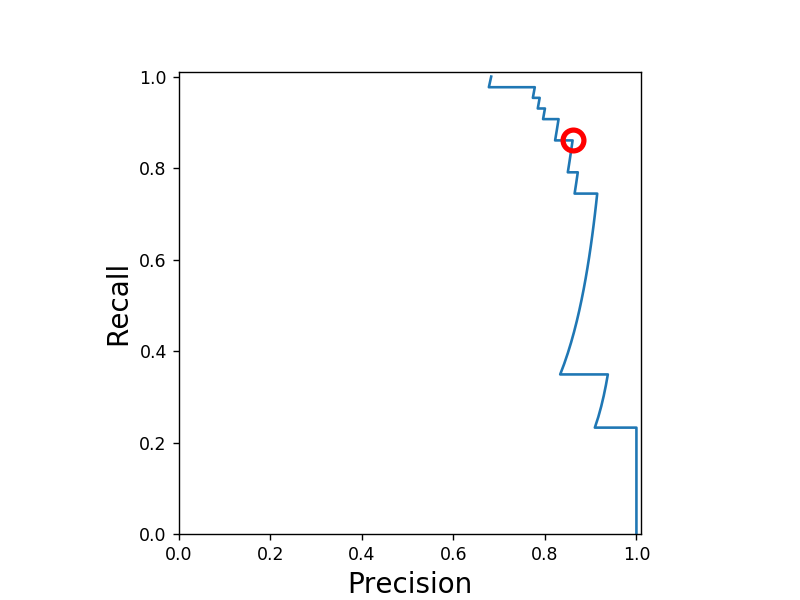

D:\ML_Workshop\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

The top right corner of the curve is the ideal point where precision is 1 and recall is 1. Therefore more the curve is towards right is preferable. The marker represents the zero threshold. There are some jaggy errors and, in fact, the jumps tend to get a little bigger as we approach maximum precision. This is a consequence of how the formulas for precision and recall are computed. They use discrete counts that include the number of true positives. And so as the decision threshold increases, there are fewer and fewer points that remain as positive predictions. So the fractions that are computed for these smaller numbers can change pretty dramatically with small changes in the decision threshold. And that's why these sort of trailing edges of the Precision-recall curve can appear a bit jagged when you plot them

# ROC curve

<IPython.core.display.Javascript object>


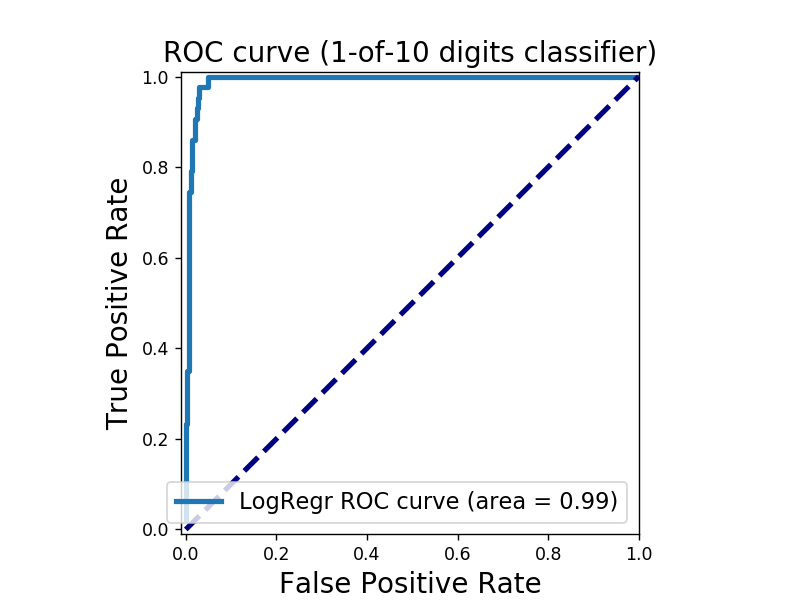

D:\ML_Workshop\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [29]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

The top left corner is the ideal point where the false positive rate is zero and true positive rate of one.

<IPython.core.display.Javascript object>


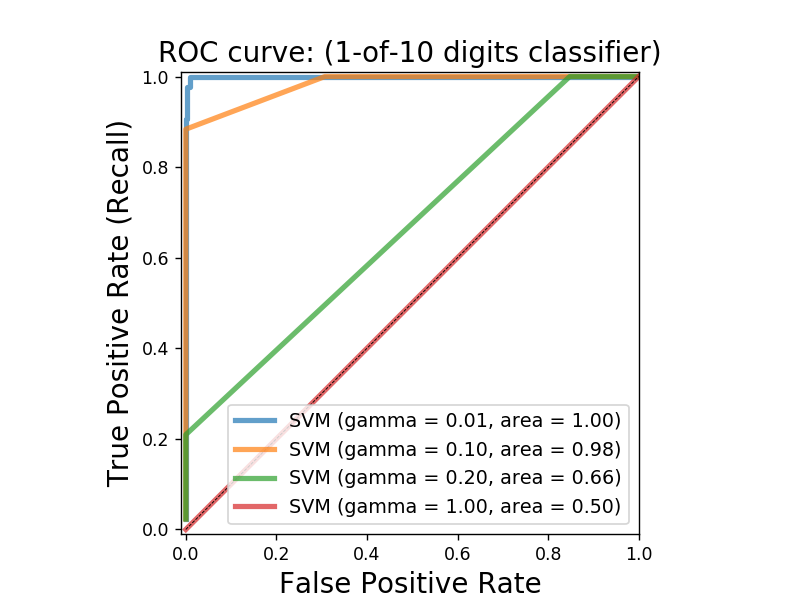

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


D:\ML_Workshop\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [30]:
 from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

Lower the gamma, better is the preformance.

<IPython.core.display.Javascript object>


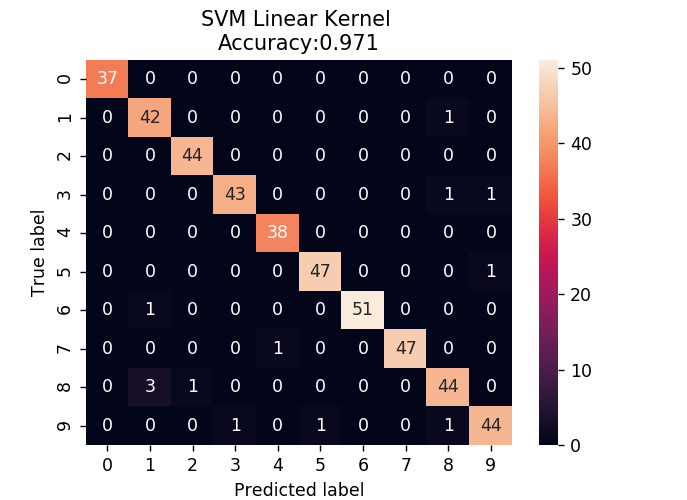

<IPython.core.display.Javascript object>


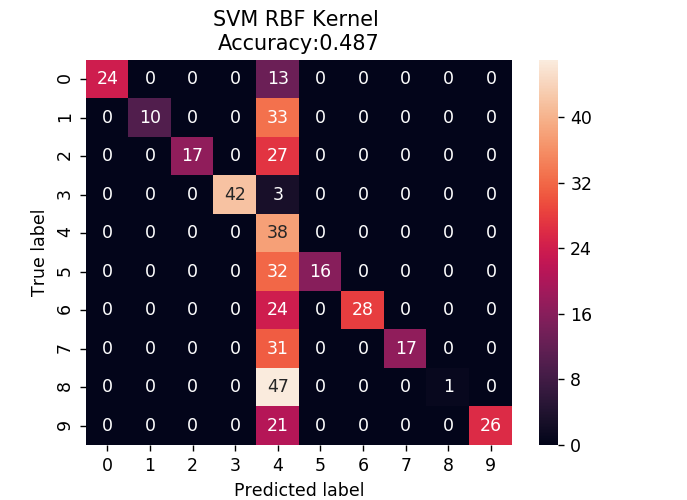

In [31]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mc, svm_predicted_mc))
# support is the number of occurances of the class in the testing data

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



#A macro average of a multiclass classfier can be predicted by:
1. Compute metric within each class
2. Average the result metrics across classes.

Here each class has equal weight

#A micro average of a multiclass classfier can be predicted by:
1. Aggregate outcomes across all classes.
2. Compute metric with aggregate outcomes

Here each instance has equal weight and largest classes have most influence.

# Some Points
1. If the classes have same number of instanced, then macro and micro average will be same. 
2. If some classes are much larger than others, and you want to weigh metric more towards large ones then we can use micro average but in case where we want a metric towards smaller ones then we can use macro average.
3. If micro average is low than macro, then examine the larger classes.
4. If macro average is low than micro, then examine the smalll classes.

# Regression Metrics

We have
1. r2 score
2. mean_absolute_error (L1 norm loss) 
3. mean_squared_error  (L2 norm loss) 
4. median_absolute_error

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


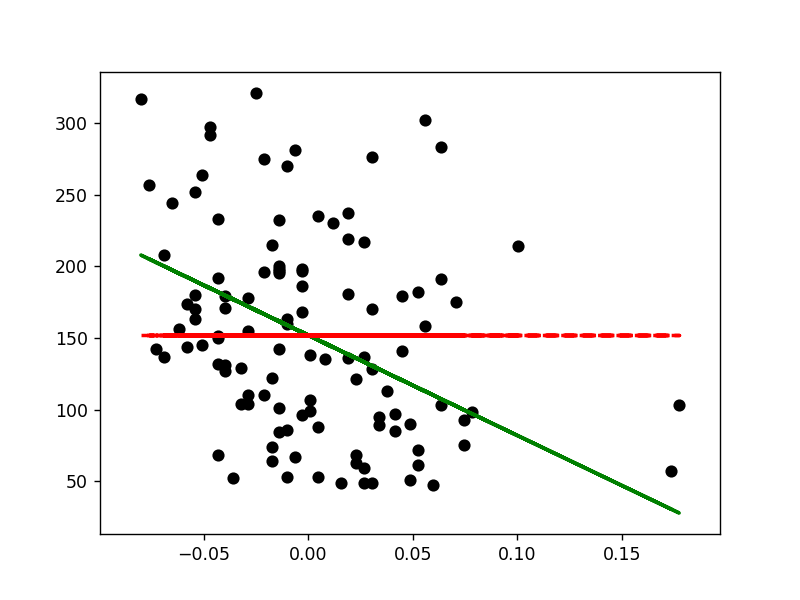

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

we have different stratigies for dummy regressor. 
1. mean 
2. median
3. quantile (75th percentile)
4. constant

# Model Selection

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
X,y = dataset.data, dataset.target==1

md = SVC(C=1, kernel='linear')

print('CV accuracy', cross_val_score(md, X,y,cv=5))
print('CV auc', cross_val_score(md, X,y,cv=5, scoring='roc_auc'))
print('CV recall', cross_val_score(md, X,y,cv=5, scoring='recall'))

CV accuracy [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
CV auc [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
CV recall [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]
